In [176]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
import string

In [177]:
# retrieving data from csv file to a pandas Dataframe
mail_data = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [178]:
mail_data.head(5)

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [179]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [180]:
# replace the null values with a null string
mail_data = mail_data.where((pd.notnull(mail_data)),'')

In [181]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [182]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

In [183]:
# label spam mail as 0;  ham mail as 1;
mail_data.loc[mail_data['Label'] == 'spam', 'Label',] = 0
mail_data.loc[mail_data['Label'] == 'ham', 'Label',] = 1

In [184]:
# separat the data as EmailText and Label
# spam - 0
# ham - 1

X = mail_data['EmailText']
X.sample(5)


2438        I not busy juz dun wan 2 go so early.. Hee.. 
5365    Camera - You are awarded a SiPix Digital Camer...
2859    I want to be there so i can kiss you and feel ...
1512    Hey sweet, I was wondering when you had a mome...
5044    We have sent JD for Customer Service cum Accou...
Name: EmailText, dtype: object

In [185]:
Y = mail_data['Label']
Y.sample(5)

752     1
303     1
2720    1
251     1
4624    1
Name: Label, dtype: object

In [186]:
print(X)
# X.head()

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568             Will ÃÂ_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: EmailText, Length: 5572, dtype: object


In [187]:
# print(Y)
Y.value_counts()
# Y.head()

1    4825
0     747
Name: Label, dtype: int64

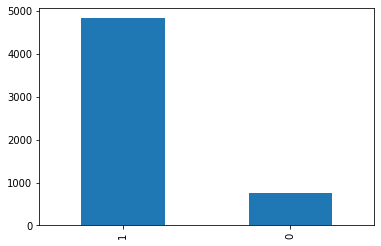

In [188]:
Y.value_counts().plot(kind='bar')

Split data into training data and test data

In [189]:
# Split data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

In [190]:
X_train.shape, X_test.shape

((4457,), (1115,))

Feature_ Extraction

In [191]:
X_train.head(5)

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012    I dunno they close oredi not... ÃÂÃÂ v ma ...
3320                               Yo im right by yo work
Name: EmailText, dtype: object

In [192]:
# transform the text data to feature vectors that can be used as input to the SVC

feature_extraction = CountVectorizer(min_df=1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

### data balancing

In [193]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_train_features, Y_train = sm.fit_resample(X_train_features, Y_train)
Y_train.value_counts()

1    3876
0    3876
Name: Label, dtype: int64

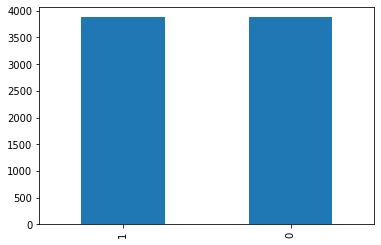

In [194]:
Y_train.value_counts().plot(kind='bar')

In [195]:
print(X_train_features)

  (0, 3700)	1
  (0, 3311)	2
  (0, 3104)	1
  (0, 891)	1
  (0, 6651)	1
  (0, 2402)	1
  (1, 2532)	1
  (1, 6487)	1
  (1, 3024)	1
  (1, 7028)	1
  (1, 3712)	1
  (1, 4290)	1
  (2, 6993)	1
  (2, 4349)	1
  (2, 5504)	2
  (2, 6121)	1
  (2, 4841)	1
  (2, 7149)	1
  (2, 3871)	1
  (2, 6912)	1
  (2, 3270)	1
  (2, 778)	1
  (2, 4050)	1
  (2, 3111)	1
  (3, 2401)	1
  :	:
  (7750, 3517)	0
  (7750, 3688)	0
  (7750, 3958)	0
  (7750, 4328)	0
  (7750, 4431)	0
  (7750, 4524)	1
  (7750, 4928)	0
  (7750, 4985)	0
  (7750, 5744)	0
  (7750, 5825)	0
  (7750, 6948)	0
  (7751, 1544)	0
  (7751, 1907)	0
  (7751, 2496)	1
  (7751, 2812)	0
  (7751, 2899)	0
  (7751, 2948)	0
  (7751, 3086)	0
  (7751, 3902)	0
  (7751, 4328)	0
  (7751, 5348)	0
  (7751, 5962)	0
  (7751, 6055)	0
  (7751, 6706)	0
  (7751, 7187)	0


In [196]:
print(X_train_features)

  (0, 3700)	1
  (0, 3311)	2
  (0, 3104)	1
  (0, 891)	1
  (0, 6651)	1
  (0, 2402)	1
  (1, 2532)	1
  (1, 6487)	1
  (1, 3024)	1
  (1, 7028)	1
  (1, 3712)	1
  (1, 4290)	1
  (2, 6993)	1
  (2, 4349)	1
  (2, 5504)	2
  (2, 6121)	1
  (2, 4841)	1
  (2, 7149)	1
  (2, 3871)	1
  (2, 6912)	1
  (2, 3270)	1
  (2, 778)	1
  (2, 4050)	1
  (2, 3111)	1
  (3, 2401)	1
  :	:
  (7750, 3517)	0
  (7750, 3688)	0
  (7750, 3958)	0
  (7750, 4328)	0
  (7750, 4431)	0
  (7750, 4524)	1
  (7750, 4928)	0
  (7750, 4985)	0
  (7750, 5744)	0
  (7750, 5825)	0
  (7750, 6948)	0
  (7751, 1544)	0
  (7751, 1907)	0
  (7751, 2496)	1
  (7751, 2812)	0
  (7751, 2899)	0
  (7751, 2948)	0
  (7751, 3086)	0
  (7751, 3902)	0
  (7751, 4328)	0
  (7751, 5348)	0
  (7751, 5962)	0
  (7751, 6055)	0
  (7751, 6706)	0
  (7751, 7187)	0


Train the Model

In [197]:
model = SVC(random_state=0, C=2.5)

In [198]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

SVC(C=2.5, random_state=0)

Evaluating the trained model

In [199]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [200]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9880030959752322


In [201]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [202]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.895067264573991


In [203]:
input_mail = ["Hey, you have won a car !!!!. Conrgratzz","You have received $1000000 to your account","You have received $1000000 to your account","Join with our whatsapp group","Kindly check the previous email. Kind Regards"]

print(input_mail)

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)


# making prediction

prediction = model.predict(input_data_features)
print(prediction)

i = 0
while(len(prediction) > i):
  if (prediction[i]==1):
    print('Ham mail')
  else:
    print('Spam mail')
  i +=1

['Hey, you have won a car !!!!. Conrgratzz', 'You have received $1000000 to your account', 'You have received $1000000 to your account', 'Join with our whatsapp group', 'Kindly check the previous email. Kind Regards']
[1 0 0 0 1]
Ham mail
Spam mail
Spam mail
Spam mail
Ham mail
